In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import time
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle as pkl
import matplotlib.pyplot as plt

import src
from src.reload import deep_reload

In [2]:
df_veh_info=pd.read_excel('vehicles-2023-06-22.xlsx')
df_veh_info=df_veh_info[~np.isnan(df_veh_info['AER Low'])]
df_veh_info.reset_index(inplace=True,drop=True)

aer_low=df_veh_info['AER Low'].to_numpy()
aer_high=df_veh_info['AER High'].to_numpy()

aer=np.zeros(df_veh_info.shape[0])

for idx in range(aer.shape[0]):
    if ~np.isnan(aer_high[idx]):
        aer[idx]=np.mean([aer_low[idx],aer_high[idx]])
    else:
        aer[idx]=aer_low[idx]

df_veh_info['AER']=aer

In [7]:
categories={'sedan':'Sedan/Wagon','suv':'SUV','pickup':'Pickup'}
premium={'economy':'No','luxury':'Yes'}
fuel={'phev':'Plug-in Hybrid Electric','bev':'Electric','hev':'Hybrid Electric'}

In [8]:
info={}

for key0,val0 in categories.items():
    info[key0]={}
    for key1,val1 in premium.items():
        info[key0][key1]={}
        for key2,val2 in fuel.items():
            
            info[key0][key1][key2]=df_veh_info[(
                (df_veh_info['Category']==val0)&
                (df_veh_info['Premium']==val1)&
                (df_veh_info['Fuel']==val2))]

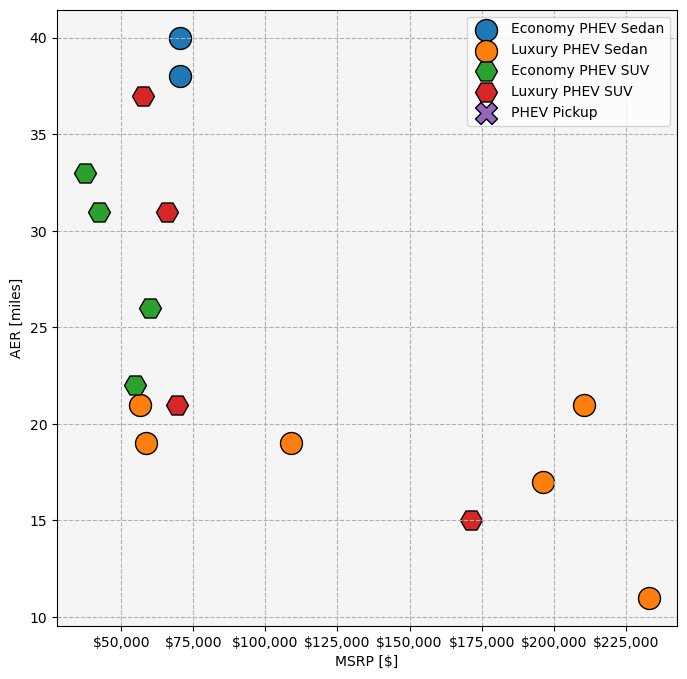

In [15]:
deep_reload(src)
import matplotlib.ticker as mtick

s=250
ec='k'
fontsize=10

plt.rc('font', size=fontsize)

fig,ax=plt.subplots(figsize=(8,8))

ax.scatter(
    info['sedan']['economy']['phev']['MSRP'],
    info['sedan']['economy']['phev']['AER'],
    s=s,marker='o',ec=ec,
    label='Economy PHEV Sedan')

ax.scatter(
    info['sedan']['luxury']['phev']['MSRP'],
    info['sedan']['luxury']['phev']['AER'],
    s=s,marker='o',ec=ec,
    label='Luxury PHEV Sedan')

ax.scatter(
    info['suv']['economy']['phev']['MSRP'],
    info['suv']['economy']['phev']['AER'],
    s=s,marker='H',ec=ec,
    label='Economy PHEV SUV')

ax.scatter(
    info['suv']['luxury']['phev']['MSRP'],
    info['suv']['luxury']['phev']['AER'],
    s=s,marker='H',ec=ec,
    label='Luxury PHEV SUV')

ax.scatter(
    info['pickup']['economy']['phev']['MSRP'],
    info['pickup']['economy']['phev']['AER'],
    s=s,marker='X',ec=ec,
    label='PHEV Pickup')

formatter=mtick.StrMethodFormatter('${x:,.0f}')
ax.set_xlabel('MSRP [$]')
ax.xaxis.set_major_formatter(formatter) 
ax.set_ylabel('AER [miles]')

ax.grid(ls='--')
ax.legend(loc=1)
ax.set_facecolor('whitesmoke')

# fig.savefig('Document/figs/PriceRange_PHEVs.png',bbox_inches='tight',dpi=300)